
<img src="http://i.imgur.com/Of6S8K9.png">


### Lesson Objectives

By the end of this lesson, you will know how to: 

- Apply gradient descent and its variants to train machine learning algorithms 

- Use `SGDClassifier` in sklearn to train models on large datasets 

- Implement Binary Logistic Regression from scratch using SGD 



### Outline
- Practice with Gradients 
- Indpendent Practice: Gradient Descent on Linear Regression 
- Gradient Descent vs. SGD vs. Batch Gradient Descent 
- Code Along: Gradient Descent on Logistic Regression
- Lab: Practice with `SGDClassifier`

## This lessons on builds on: 

- Derivatives, Gradients
- Logistic Regression

### Review: Supervised Machine Learning
<img src = http://cs231n.github.io/assets/dataflow.jpeg> 
<img src = http://cs231n.github.io/assets/svmvssoftmax.png>

--- 
### Review: Logistic Regression

$$ P(y=1| x) = h_{\theta}(x) = \frac{1}{1 + \exp(-\theta^\top x)} \equiv \sigma(\theta^\top x) $$

$$ P(y=0| x) = 1 - P(y=1|x) = 1 - h_\theta(x) $$


#### Log-Loss Function: 

$$ J(\theta) = - \sum_i \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right) $$




> **Check**: Given a loss function, what are some (non-derivative based) ways you can think of to find a minimum of that loss function? 

--- 
<a href=https://betterexplained.com/articles/calculus-building-intuition-for-the-derivative/> Intuition for the Derivative </a>

<a href=https://betterexplained.com/articles/vector-calculus-understanding-the-gradient/> Understand Gradients </a>

> **Check**:  Pair up with a partner and define what gradients, derivatives in an intuitive manner and why are they useful to us. 



### Intuition for Gradients: Cooking the Pillsbury Dough Boy

<img src= https://betterexplained.com/wp-content/uploads/gradient/gradient_microwave_1_1.jpg>

# Gradients

The [gradient of a function](https://en.wikipedia.org/wiki/Gradient) is a multivariate derivate with a crucial property -- the gradient points in the direction of the greatest rate of increase of the function. Many physical processes can be modeled by gradient and gradient flows, such as the flow of water down a mountain and the movement of charged particles in electromagnetic potentials.

As data scientists we use gradient descent to maximize or minimize various functions. For example, to find a good model fit we could attempt to minimize a loss function by following the gradient through many iterations in parameter-space. In particular, gradient descent can be used for [linear regression](https://en.wikipedia.org/wiki/Gradient_descent#Solution_of_a_linear_system). Let's take a close look.

If we want to minimize a multivariate function $f(\mathbf{a})$ -- typically a function of our parameters $\mathbf{a} = (a_1, \ldots, a_n)$ computed on our dataset -- we start with a guess $\mathbf{a}_1$ and compute the next step using the gradient, denoted by $\nabla f$:

$$ \mathbf{a}_2 = \mathbf{a}_1 - \lambda \nabla f(\mathbf{a}_1)$$

Note the differences in notation carefully -- bold face indicates a vector of parameters. The variable $\lambda$ is a parameter that controls the step size and is sometimes called the _learning rate_. Essentially we are taking a local linear approximation to our function, stepping a small bit in the direction of greatest change, and computing a new linear approximation to the function. We repeat the process until we converge to a minimum:

$$ \mathbf{a}_{n+1} = \mathbf{a}_n - \lambda \nabla f(\mathbf{a}_n)$$

This is the _gradient descent_ algorithm. It is used for a variety of machine learning models including some that you will learn about soon, such as logistic regression, support vector machines, and neural networks.

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)


## Practice with Gradients

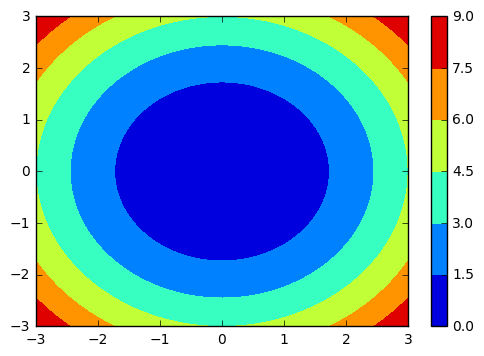

In [24]:
def function_to_optimize(x, y):
    return 0.5 * (x **2 + y **2 )

def gradient_fn(x, y):
    pass # to do in class 

def gradient_descent(gradient_fn, x0, y0, l=0.1):
    vector = np.array([x0, y0])
    gradient = gradient_fn(x0, y0)
    return vector - l * np.array(gradient)
    
    
    
    

import numpy as np
import matplotlib.pyplot as plt

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)

Z = function_to_optimize(X, Y)

CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

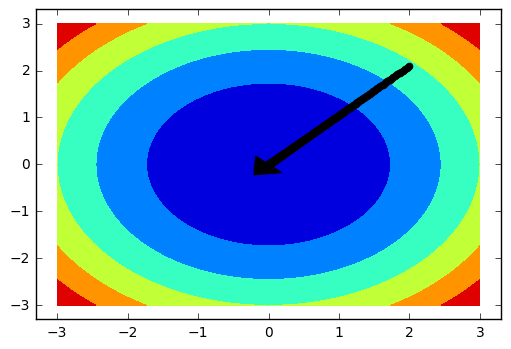

4.49754969963e-44 4.72242718461e-44


In [42]:
delta = 0.025
x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)
CS = plt.contourf(X, Y, Z)

xs = [2]
ys = [2.1]
for i in range(10000):
    x, y = gradient_descent(gradient, xs[-1], ys[-1], l=0.01)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys, color="black")
plt.plot(xs, ys, color="black")
ax = plt.gca()
ax.arrow(xs[-2], ys[-2], xs[-1] - xs[-2], ys[-1] - ys[-2], head_width=0.5, head_length=0.3, fc='k', ec='k')
plt.show()
print xs[-1], ys[-1]

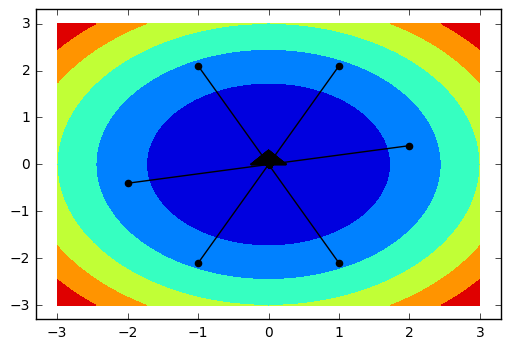

In [39]:
delta = 0.025
x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)
CS = plt.contourf(X, Y, Z)

epochs = 5

for (i, j) in [(-1, 2.1), (1, 2.1), (2, 0.4), (-2, -0.4), (-1, -2.1), (1, -2.1)]:
    xs = [i]
    ys = [j]
    for i in range(epochs):
        x, y = gradient_descent(gradient, xs[-1], ys[-1], l=1)
        xs.append(x)
        ys.append(y)
    
    ax = plt.scatter(xs, ys, color="black")
    ax = plt.gca()
    ax.arrow(xs[1], ys[1], xs[3] - xs[1], ys[3] - ys[1], head_width=0.5, head_length=0.3, fc='k', ec='k')
    plt.plot(xs, ys, color="black")

plt.show()

### Exercise
Here is a [nice example](http://math.stackexchange.com/questions/770622/gradient-descent-algorithm-always-converges-to-the-closest-local-optima) of when gradient descent gets stuck at a local minimum. Let's implement these functions and see that gradient descent gets stuck.

The function is:
$$f(x) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Walk throught the following code samples.

In [62]:
def func(x):
    if x <= 1:
        return 2*x**2
    else:
        return 2
    
def gradient(x):
    if x <= 1:
        return 4*x
    else:
        return 0 

def gradient_descent(x, l=0.1):
    return x - l * gradient(x)

def iterate(x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x0 = gradient_descent(x0)
        y0 = func(x0)
        xs.append(x0)
        ys.append(y0)
    return xs, ys

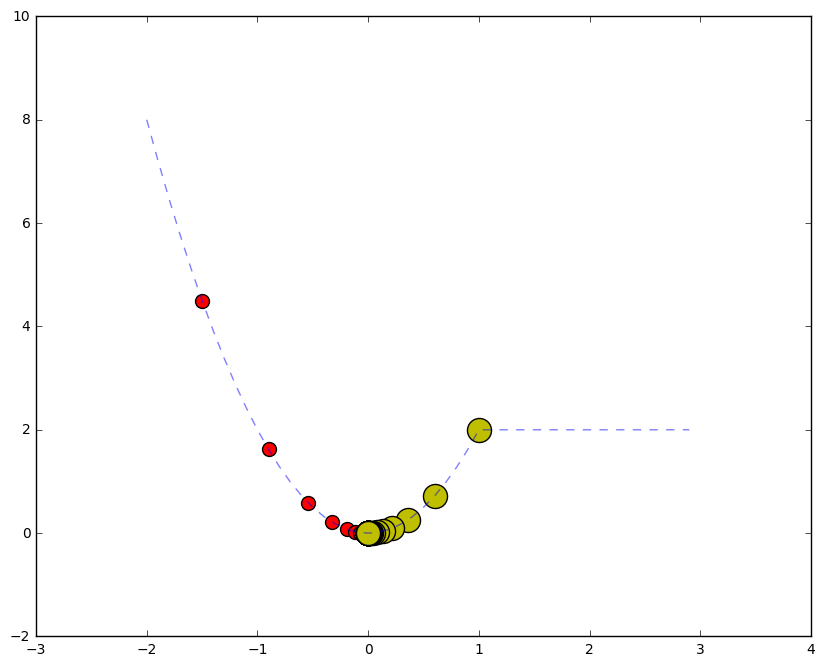

In [63]:
%matplotlib inline
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
epochs = 100
xs2, ys2 = iterate(-1.5, n=epochs)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2
xs3, ys3 = iterate(1, n=epochs)
plt.scatter(xs3, ys3, c='y', s=300)

### Exercise

Similarly, use the function $f(x) = x^4 - 2* x^2 + x +1$ and apply gradient descent. If you need help with the derivative, you can use [Wolfram Alpha](http://www.wolframalpha.com/calculators/derivative-calculator/).

Steps:
* Plot the function and identify the two minima
* Compute the derivative
* Using gradient descent, find two starting points that converge to different minima

Questions:
* What does this tell you about the end result of gradient descent?
* What are the implications for putting gradient descent into practice?

In [73]:
def func_2(x):
    return x ** 4 - 2 * x ** 2 + x + 1
    
def gradient(x):
    return 4 * x ** 3 - 4 * x + 1 

def gradient_descent(x, l=0.1):
    return x - l * gradient(x)

def iterate(x0, n=10, lr=0.1):
    xs = [x0]
    ys = [func_2(x0)]
    for i in range(n):
        x0 = gradient_descent(x0, l=lr)
        y0 = func_2(x0)
        xs.append(x0)
        ys.append(y0)
    return xs, ys

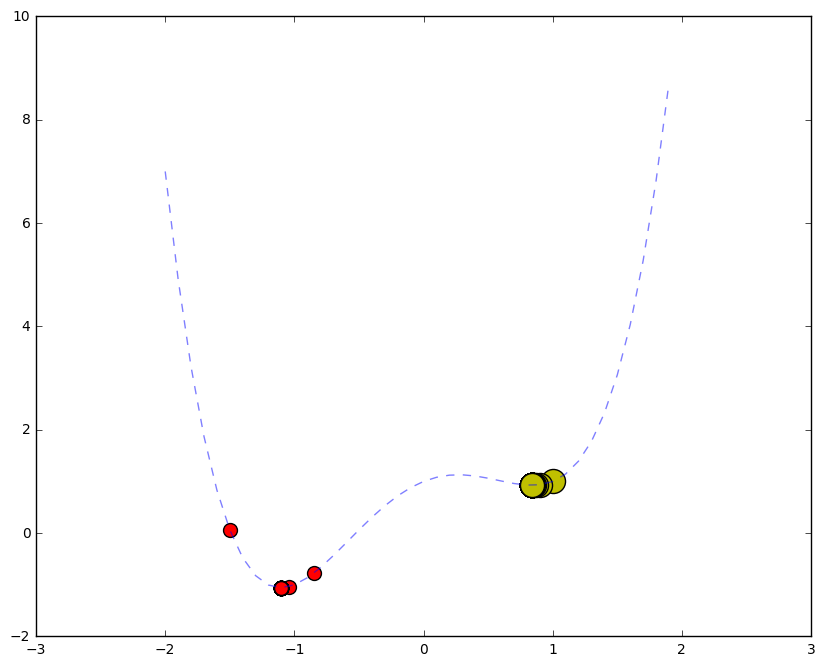

In [78]:
%matplotlib inline
xs = np.arange(-2, 2, 0.1)
ys = map(func_2, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
epochs = 100
xs2, ys2 = iterate(-1.5, n=epochs, lr=0.1)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2
xs3, ys3 = iterate(1, n=epochs)
plt.scatter(xs3, ys3, c='y', s=300)

### Stochastic Gradient Descent

What is the difference between gradient descent and stochastic gradient descent? It's actually a very small difference, but has big implications.

Instead of **all** the samples updating the gradient at a time, **only one** sample updates the gradient (iterating over all the observations, though this can change based on specification) within each overall iteration.

Stochastic gradient descent has some nice properties over gradient descent:

- It solves faster since it immediately starts to update the gradient.
- It can handle much, much larger datasets since it only needs to calculate a single row or small batch of rows of the entire dataset.

The downside is that the MSE may not converge to an optimal value as well, since local minima become more likely. However, it typically _does_ converge to an optimal, so this risk is a small one. 

### Vanilla Gradient Descent: Update Weights At Once 

    while True:
      weights_grad = evaluate_gradient(loss_fun, data, weights)
      weights += - step_size * weights_grad # perform parameter update
      
      
      
### Minibatch Gradient Descent: 
          
<img src=http://sebastianraschka.com/images/faq/closed-form-vs-gd/iter_gd.png align=center>

      
### Stochastic Gradient Descent: 
 
<img src=http://sebastianraschka.com/images/faq/closed-form-vs-gd/iter_sgd.png>
      
<img src=http://image.slidesharecdn.com/pkfetdxyqpiy2i94fvzv-signature-25ed596523f4a669f9a710899d8eaf303c4bbdce8b8e80e99e004c3f91b28bcc-poli-151222094839/95/recommender-systems-50-638.jpg?cb=1450777740>




### In Summary, Gradient Descent vs. Minbatch Gradient Descent vs. SGD: 
- Hard to load X, y in memory at times so need to use minbatch gradient descent or SGD
- Converges faster 
- MGD most common and works well because datasets are always correlated

> ** Check for Understanding **: Let's Implement Logistic Regression from Scratch 

In [102]:
test = [rng.uniform(0, 1) for i in range(100)]
preds = np.array([[prob, 1-prob] for prob in test])
label = np.array([rng.choice([0, 1]) for i in range(100)])
label = np.array([np.eye(2)[i] for i in label]) ## one hot encoding 

In [197]:
X = rng.random((128, 10))
y = label = np.array([rng.choice([0, 1]) for i in range(128)])

my_logit = LogisticRegression()
my_logit.fit(X, y)

print np.mean(np.argmax(my_logit.predict(X), axis=1) == y)

/Users/Vrushank/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Vrushank/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.4453125


In [198]:
from sklearn.linear_model import SGDClassifier as LR
sklearn_logit = LR()
sklearn_logit.fit(X, y)
np.mean(sklearn_logit.predict(X) == y)

0.640625

## Converge of Variants of SGD Algorithms 
<img src=http://i.imgur.com/2dKCQHh.gif>
<img src=http://2.bp.blogspot.com/-L98w-SBmF58/VPmICIjKEKI/AAAAAAAACCs/rrFz3VetYmM/s1600/Beale%26amp%3B%23039%3Bs%2Bfunction%2B-%2BImgur.gif>

### Additional Resources 

<a href=http://leon.bottou.org/publications/pdf/compstat-2010.pdf> Large Scale ML with SGD </a>

<a href=http://sebastianruder.com/optimizing-gradient-descent/index.html#fn:22> Variants of SGD </a>

<img src=https://pbs.twimg.com/media/C3nkAm2VUAID94h.jpg>